In [21]:
import mglearn
import sklearn
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import export_graphviz


Частоты признаков:
{0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}


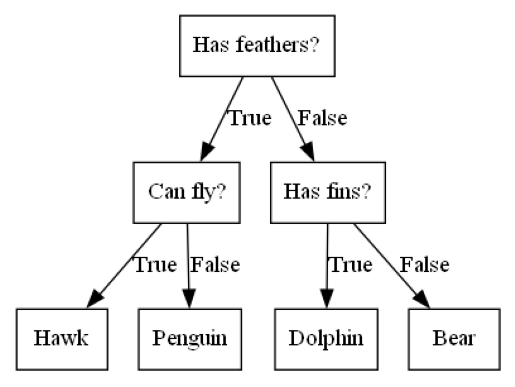

In [22]:

X = np.array([[0, 1, 0, 1], [1, 0, 1, 1], [0, 0, 0, 1], [1, 0, 1, 0]])
y = np.array([0, 1, 0, 1])

counts = {}
for label in np.unique(y):
    counts[label] = X[y == label].sum(axis=0)
print("Частоты признаков:\n{}".format(counts))
mglearn.plots.plot_animal_tree()
plt.show()


На  этом рисунке каждый  узел  дерева  либо  представляет  собой  либо  вопрос,  либо терминальный узел (его еще называют листом или leaf), который содержит ответ. Ребра соединяют вышестоящие узлы с нижестоящими

Построение дерева решений означает построение последовательности правил «если... то...», которая приводит нас к истинному ответу максимально коротким путем. В машинном обучении эти правила называются тестами (tests

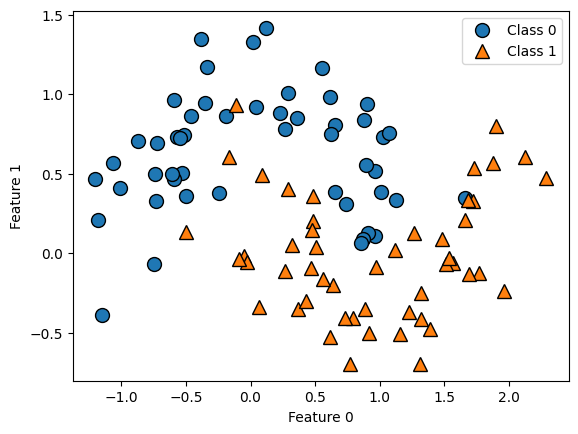

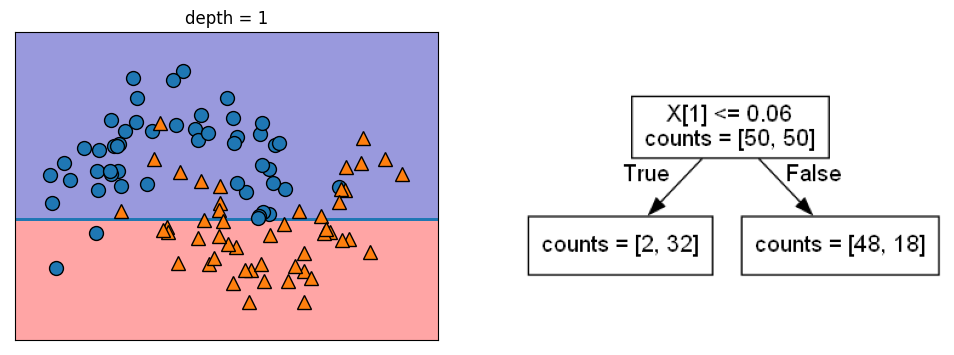

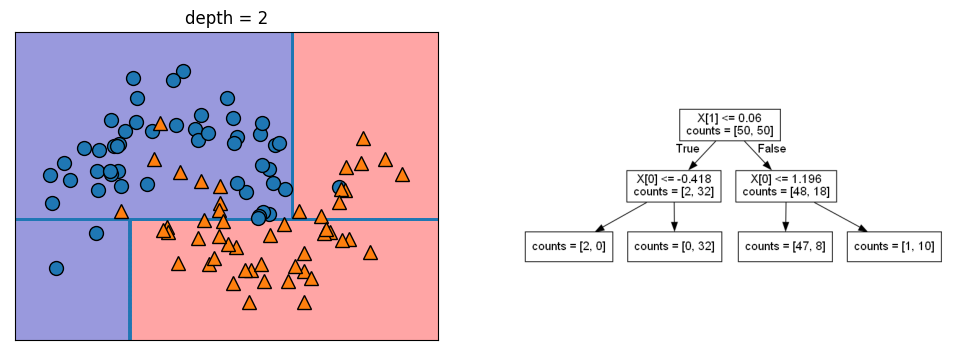

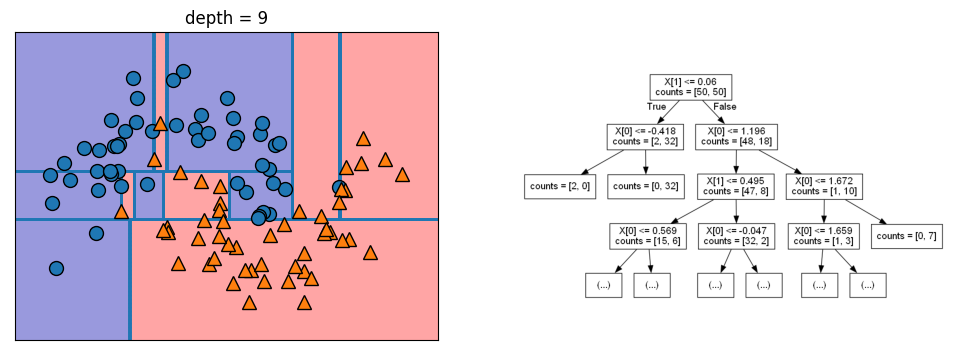

In [23]:

mglearn.plots.plot_tree_progressive()
plt.show()


Верхний узел, также называемый корнем (root), представляет 
собой  весь  набор  данных,  состоящий  из  50  точек,  принадлежащих  к  классу  0,  и  50  точек, принадлежащих  к  классу  1.  Разделение  выполняется  путем  тестирования  х[1]<=0.0596,

Рекурсивное разбиение данных повторяется до тех пор, пока все точки данных в каждой области разбиения (каждом листе дерева решений) не будут принадлежатьодному и тому же значению целевой переменной (классу или количественному значению). Лист дерева, который содержит  точки  данных,  относящиеся  к  одномуи  тому  же  значению  целевой  переменной, называется чистым (pure). Итоговое разбиение для нашего набора данных показано на рис. 8.5

Есть две общераспространенные стратегии, позволяющие предотвратить переобучение. Первая стратегия –ранняя остановка построения дерева, называемая предварительной обрезкой (pre-pruning). Вторая стратегия –построение дерева с последующим удалением или сокращением малоинформативных  узлов,  называемое пост-обрезкой(post-pruning)  или  просто обрезкой(pruning).  Возможные  критерии  предварительной  обрезки  включают  в  себя ограничение максимальной глубины дерева,ограничение максимального количества листьев или минимальное количество наблюдений в узле, необходимое для разбиения.В библиотеке scikit-learn деревья решений реализованы в классахDecisionTreeRegressorи DecisionTreeClassifier. Обратите внимание, в scikit-learn реализована лишь предварительная обрезка.

In [24]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split


In [25]:

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.3f}".format(tree.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(tree.score(X_test, y_test)))


Правильность на обучающем наборе: 1.000
Правильность на тестовом наборе: 0.937


In [26]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.3f}".format(tree.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(tree.score(X_test, y_test)))


Правильность на обучающем наборе: 0.988
Правильность на тестовом наборе: 0.951


построения дерева до того, как мы идеально подгоним модель к обучающим данным. Один из вариантов –остановка процесса построения дерева по достижении определенной глубины. Здесь мы установим max_depth=4, то есть можно задать только четыре последовательных вопроса 

In [27]:
from sklearn.tree import export_graphviz

export_graphviz(tree, out_file="tree.dot", class_names=["malignant", "benign"],
                feature_names=cancer.feature_names, impurity=False, filled=True)
import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)
"Export as pdf"
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn import tree


In [28]:

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
clf = tree.DecisionTreeClassifier(max_depth=4, random_state=0)
clf = clf.fit(X_train, y_train)


In [29]:
import pydotplus

dot_data = tree.export_graphviz(clf, out_file=None)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_pdf("cancer.pdf")
"Create tree with using IPython"


'Create tree with using IPython'

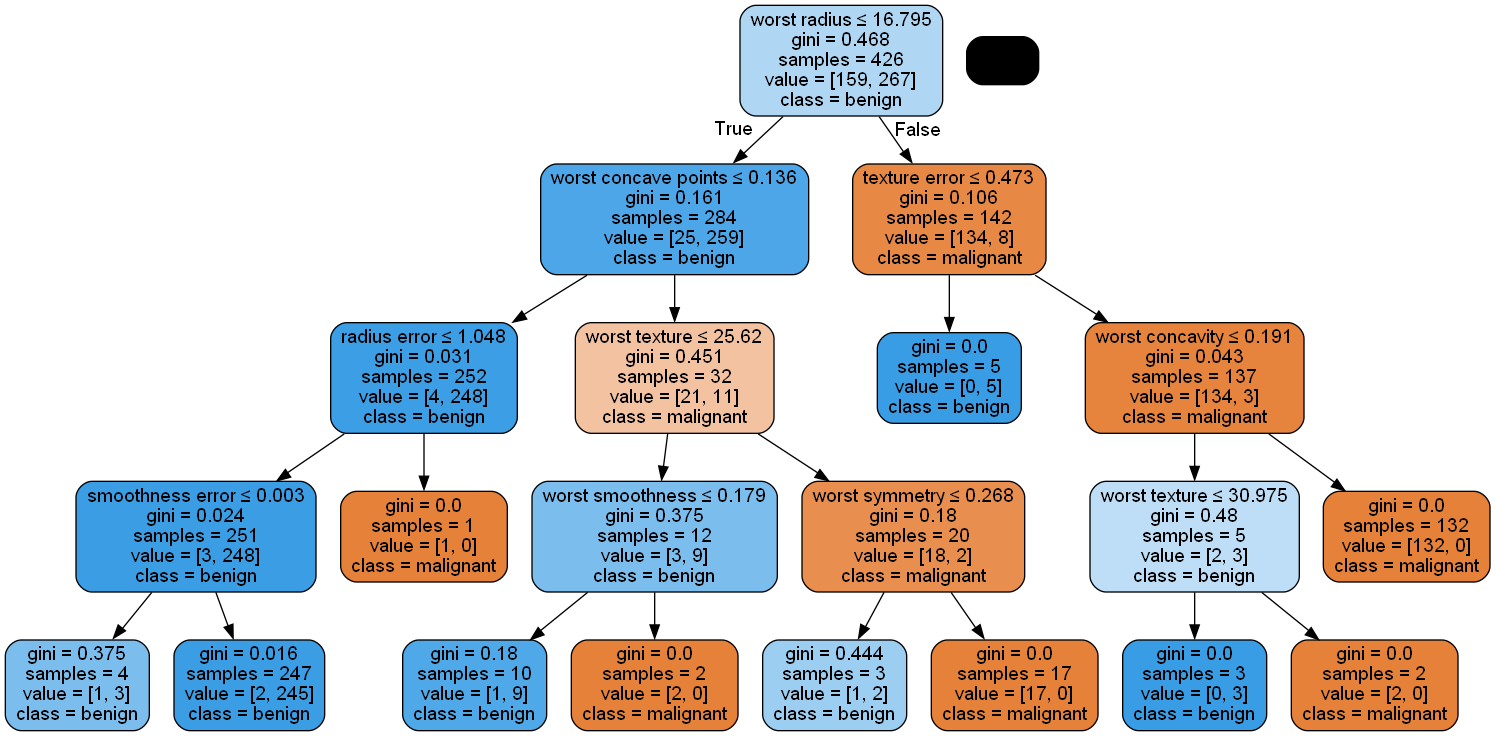

In [30]:
from IPython.display import Image

dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=cancer.feature_names,
                                class_names=cancer.target_names,
                                filled=True, rounded=True,
                                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())


 Параметр samples, выводимый в каждом узле на рис. 8.6, показывает общее количество примеров в узле, тогда как параметр valueпоказывает количество примеров в каждом классе. 

In [31]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier().fit(X_train, y_train)
print("Важности признаков:\n{}".format(tree.feature_importances_))


Важности признаков:
[0.         0.         0.         0.         0.         0.
 0.         0.01354675 0.         0.         0.00975731 0.04630969
 0.         0.00231135 0.00238745 0.00752597 0.         0.
 0.         0.         0.70298919 0.05383211 0.         0.00903116
 0.         0.         0.02409287 0.11684357 0.01137258 0.        ]


Вместо того, чтобы просматривать все дерево, что может быть обременительно, есть некоторые полезные  параметры, которые  мы можем использовать  как  итоговые показатели работы дерева. Наиболее часто используемым показателем является важность признаков (featureimportance

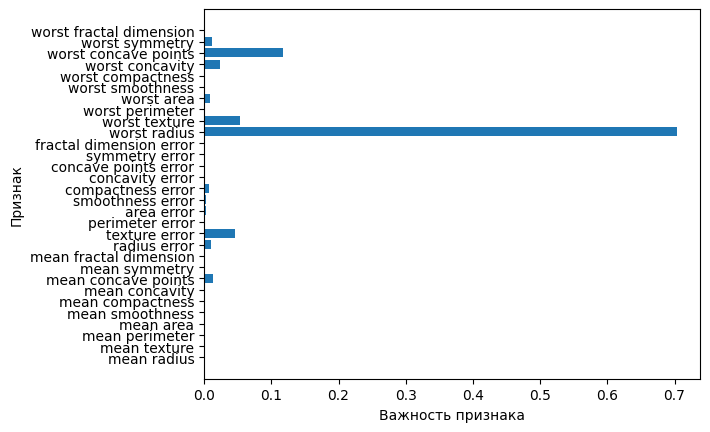

In [32]:


def plot_feature_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Важность признака")
    plt.ylabel("Признак")
    plt.show()

plot_feature_cancer(tree)
    



Несмотря  на  то  что  мы  сосредоточились  здесь  на  деревьях  классификации,  все вышесказанное верно и для деревьев регрессии, которые реализованы в DecisionTreeRegressor. Применение и анализ деревьев регрессии очень схожи с применением и анализом деревьев классификации.  Однако существует одна особенность  использования  деревьев  регрессии,  на которую нужно указать. DecisionTreeRegressor(и все остальные регрессионные моделина основе дерева) не умеет экстраполировать или делать прогнозы вне диапазона значений обучающих данны

Здесь мы видим, что признак, использованный в самом верхнем разбиении (worst radius), на данный момент является наиболее важным. Это подтверждает наш вывод о том, что уже на первом уровне два класса достаточно хорошо разделены

Однако, если признак имеет низкое значение feature_importance_, это не значит, что он неинформативен. Это означает только то, что данный признак не былвыбран деревом, поскольку, вероятно,  другой  признак  содержит  ту  же  самую  информацию.отличие  от  коэффициентов линейных моделей важности признаков всегда положительны и они не указывают на взаимосвязь с каким-то конкретным классом. Важности признаков говорят нам, что worst radiusважен, но мы не  знаем,  является  ли  высокое  значение  радиуса  признаком  доброкачественной  или злокачественной опухоли

Feature importances: [0. 1.]


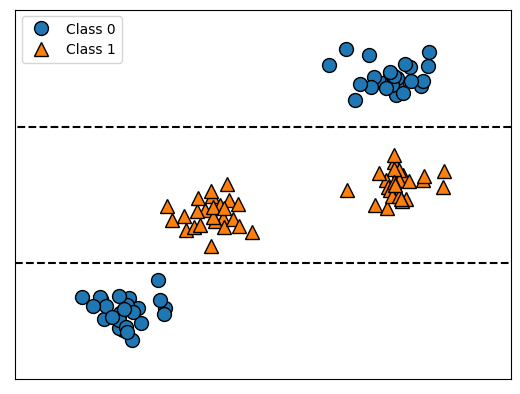

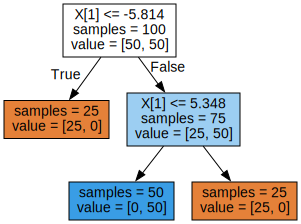

In [33]:
tree = mglearn.plots.plot_tree_not_monotone()
plt.show()
from IPython.display import display

display(tree)


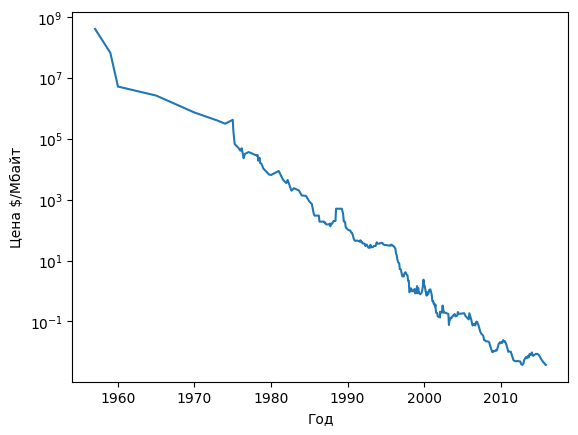

In [35]:
import pandas as pd

ram_prices = pd.read_csv("ram_price.csv")
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("Год")
plt.ylabel("Цена $/Мбайт")
plt.show()


In [36]:

from sklearn.tree import DecisionTreeRegressor

data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]
y_train = np.log(data_train.price)
X_train = data_train.date[:, np.newaxis]
print("X:\n{}".format(X_train))
print("y:\n{}".format(y_train))
tree = DecisionTreeRegressor().fit(X_train, y_train)


X:
[[1957.  ]
 [1959.  ]
 [1960.  ]
 [1965.  ]
 [1970.  ]
 [1973.  ]
 [1974.  ]
 [1975.  ]
 [1975.08]
 [1975.25]
 [1975.75]
 [1976.  ]
 [1976.17]
 [1976.42]
 [1976.58]
 [1977.08]
 [1978.17]
 [1978.25]
 [1978.33]
 [1978.5 ]
 [1978.58]
 [1978.75]
 [1979.  ]
 [1979.75]
 [1980.  ]
 [1981.  ]
 [1981.58]
 [1982.  ]
 [1982.17]
 [1982.67]
 [1983.  ]
 [1983.67]
 [1984.  ]
 [1984.58]
 [1985.  ]
 [1985.33]
 [1985.42]
 [1985.5 ]
 [1985.58]
 [1985.67]
 [1985.83]
 [1985.92]
 [1986.  ]
 [1986.08]
 [1986.17]
 [1986.25]
 [1986.33]
 [1986.42]
 [1986.5 ]
 [1986.58]
 [1986.67]
 [1986.75]
 [1986.92]
 [1987.  ]
 [1987.08]
 [1987.17]
 [1987.25]
 [1987.33]
 [1987.42]
 [1987.5 ]
 [1987.58]
 [1987.67]
 [1987.75]
 [1987.83]
 [1987.92]
 [1988.  ]
 [1988.08]
 [1988.17]
 [1988.33]
 [1988.42]
 [1988.5 ]
 [1988.58]
 [1988.67]
 [1988.75]
 [1988.83]
 [1988.92]
 [1989.  ]
 [1989.08]
 [1989.17]
 [1989.25]
 [1989.42]
 [1989.5 ]
 [1989.58]
 [1989.67]
 [1989.75]
 [1989.83]
 [1989.92]
 [1990.  ]
 [1990.17]
 [1990.33]
 [1990.

C:\Temp\ipykernel_1592\2998769741.py:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_train = data_train.date[:, np.newaxis]


In [37]:

from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression().fit(X_train, y_train)
X_all = ram_prices.date[:, np.newaxis]
pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)


C:\Temp\ipykernel_1592\2864027426.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_all = ram_prices.date[:, np.newaxis]


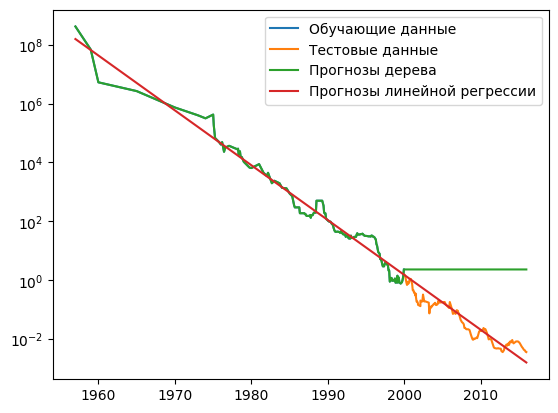

In [38]:

plt.semilogy(data_train.date, data_train.price, label="Обучающие данные")
plt.semilogy(data_test.date, data_test.price, label="Тестовые данные")
plt.semilogy(ram_prices.date, price_tree, label="Прогнозы дерева")
plt.semilogy(ram_prices.date, price_lr, label="Прогнозы линейной регрессии")

plt.legend()
plt.show()


Мы будем прогнозировать цены на период после 2000 года, используя исторические данные до этого момента, единственным признаком будут даты. Мы сравним две простые модели: DecisionTreeRegressorи LinearRegression. Мы отмасштабируем цены, используя логарифм, таким образом,  взаимосвязь  будет  относительно  линейной.  Это  несущественно  для DecisionTreeRegressor,  однако  существенно  для LinearRegression.  После  обучения  модели  и получения  прогнозов  мы  применим  экспоненцирование,  чтобы  обратить  логарифмическое преобразование. Мы  получим и  визуализируем  прогнозы  для  всего  набора  данных,  но  для количественной оценки мы будем рассматривать только тестовый набор

Разница  между  моделями  получилась  весьма  впечатляющая.  Линейная  модель аппроксимирует данные с помощью уже известной нам прямой линии. Эта линия дает достаточно хороший прогноз для тестовых данных (период после 2000 года), при этом сглаживая некоторые всплески  в  обучающих  и  тестовых  данных.  С  другой  стороны,  модель  дерева  прекрасно прогнозирует на обучающих данных. Здесь мы не ограничивали сложность дерева, поэтому она полностью запомнила весь набор данных. Однако, как только мы выходим из диапазона значений, известных модели, модель просто продолжает предсказывать последнюю известную точку. Дерево не способно генерировать «новые» ответы, выходящие за пределы значений обучающих данных. Этот недостаток относится ко всем моделям на основе деревьев решений.
